# Import data and packages

In [79]:
import csv
import numpy as np
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Ok, we've got our data and basic packages in. Let's have a poke around the data.

# Exploring the data

In [20]:
print(train.shape)
print(train.store.unique())
print(train.country.unique())
print(train['product'].unique())
print(max(train.date))
print(min(train.date))
train.head(20)

(230130, 6)
['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']
['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']
['Holographic Goose' 'Kaggle' 'Kaggle Tiers' 'Kerneler'
 'Kerneler Dark Mode']
2016-12-31
2010-01-01


,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0
6,6,2010-01-01,Canada,Stickers for Less,Kaggle,1837.0
7,7,2010-01-01,Canada,Stickers for Less,Kaggle Tiers,1659.0
8,8,2010-01-01,Canada,Stickers for Less,Kerneler,807.0
9,9,2010-01-01,Canada,Stickers for Less,Kerneler Dark Mode,940.0


## Finding NAs
We can see a missing value in our target variable. Let's look further into this and decide how we want to handle NAs in our dataset.

In [87]:
print(train.num_sold.isna().sum())
train.query('num_sold.isna()')

8871


,id,date,country,store,product,num_sold,weekday,day,month,year
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,4,1,1,2010
45,45,2010-01-01,Kenya,Discount Stickers,Holographic Goose,NaN,4,1,1,2010
90,90,2010-01-02,Canada,Discount Stickers,Holographic Goose,NaN,5,2,1,2010
135,135,2010-01-02,Kenya,Discount Stickers,Holographic Goose,NaN,5,2,1,2010
180,180,2010-01-03,Canada,Discount Stickers,Holographic Goose,NaN,6,3,1,2010
...,...,...,...,...,...,...,...,...,...,...
229905,229905,2016-12-29,Kenya,Discount Stickers,Holographic Goose,NaN,3,29,12,2016
229950,229950,2016-12-30,Canada,Discount Stickers,Holographic Goose,NaN,4,30,12,2016
229995,229995,2016-12-30,Kenya,Discount Stickers,Holographic Goose,NaN,4,30,12,2016
230040,230040,2016-12-31,Canada,Discount Stickers,Holographic Goose,NaN,5,31,12,2016


We can see some patterns in the NA results. They are typically from Canada or Kenya and mostly for the Holographic Goose Product. My gut is telling me the missing values are a stand in for 0. Let's explore further.

In [109]:
print(train.query('num_sold == 0').size)

train[['country', 'product','num_sold']].groupby(['country', 'product']).mean().round(1).sort_values('num_sold')

0


num_sold
country   product                     
Kenya     Holographic Goose        5.8
          Kerneler                14.0
          Kerneler Dark Mode      16.4
          Kaggle Tiers            25.9
          Kaggle                  31.4
Italy     Holographic Goose      128.4
Finland   Holographic Goose      177.4
Singapore Holographic Goose      204.7
Canada    Holographic Goose      241.2
Norway    Holographic Goose      337.6
Italy     Kerneler               415.5
          Kerneler Dark Mode     486.0
Finland   Kerneler               572.8
Canada    Kerneler               583.9
Singapore Kerneler               661.2
Finland   Kerneler Dark Mode     671.9
Canada    Kerneler Dark Mode     681.8
Italy     Kaggle Tiers           760.7
Singapore Kerneler Dark Mode     773.5
Italy     Kaggle                 920.5
Finland   Kaggle Tiers          1048.2
Canada    Kaggle Tiers          1069.6
Norway    Kerneler              1089.7
Singapore Kaggle Tiers          1210.9
Finland   Kaggle                1270.9
Norway    Kerneler Dark Mode    1276.6
Canada    Kaggle                1292.3
Singapore Kaggle                1465.0
Norway    Kaggle Tiers          1994.7
          Kaggle                2414.2

We can see that there are no records with a '0' and that Kenya has the lowest number of sales from any country and Holographic Goose has the lowest sales of any product. Considering all this, its a safe bet that we can comfortably replace all NA values with 0.

In [116]:
train['num_sold'] = train['num_sold'].fillna(0)

## Finding Patterns
We've mostly got categorical variables. Country, store, product and a date. The date will help us pull out seasonality factors. Ideally what we'll see with the categorical variables is some patterns around different stores that either hold constant (Store A is in a populated area and always sells more) or we'll see different stores have different peaks times depending on the day of the week or time of year. Let's check.

<Axes: xlabel='store', ylabel='num_sold'>

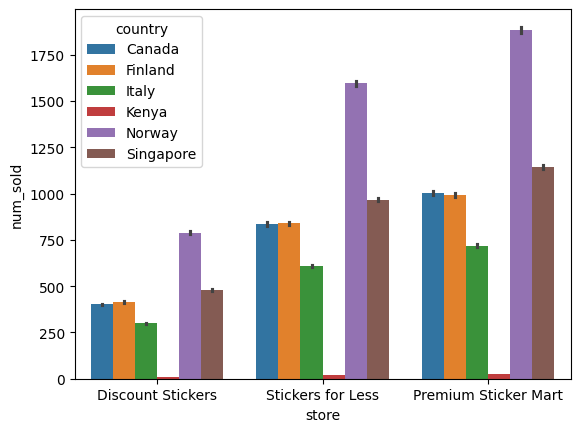

In [117]:
sns.barplot(x='store', y='num_sold', data=train, hue='country')

We can already see some patterns emerging that hold more or less constant to coutry regardless of store. Norway is always the highest seller followed by Singapore with Canada close behind. Then comes Finland and Kenya always coming up last. 

Similarly we can see the stores maintaining constant ordering regardless of country.

<Axes: xlabel='store', ylabel='num_sold'>

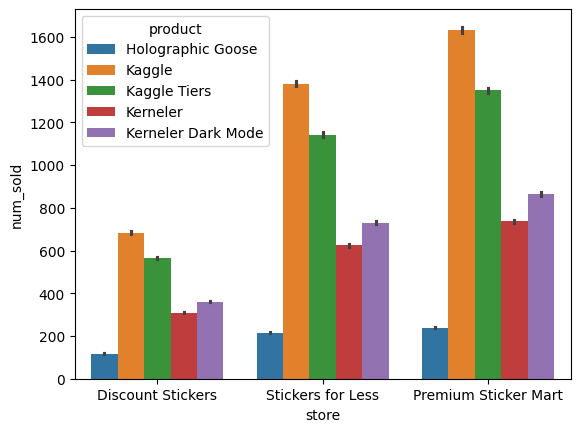

In [27]:
sns.barplot(x='store', y='num_sold', data=train, hue='product')

Again here we see patterns holding across store and product. Kaggle the most popular product regardless of store and Premium Sticker Mart is the highest selling store for every product. The more we look, the more it looks like the relationship between our target variable and the three categorical variables is relatively straight forward.

Let's look into our date variable. First we'll look into the distribtution of sales across the different days of the week. It would be a fair assumption that Saturdays and Sundays have higher average sales. After that, we'll look into typical retail events like the Christmas period.

## Exploring date data
The first step is to convert our date to a datetime type field and pull out the weekday (0-6), year, month and day (1-31) elements for investigation.

In [80]:
train['date'] = pd.to_datetime(train.date)
train['weekday'] = train.date.dt.weekday
train['day'] = train.date.dt.day
train['month'] = train.date.dt.month
train['year'] = train.date.dt.year
train.head(300)

,id,date,country,store,product,num_sold,weekday,day,month,year
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,4,1,1,2010
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,4,1,1,2010
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,4,1,1,2010
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,4,1,1,2010
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,4,1,1,2010
...,...,...,...,...,...,...,...,...,...,...
295,295,2010-01-04,Finland,Premium Sticker Mart,Holographic Goose,295.0,0,4,1,2010
296,296,2010-01-04,Finland,Premium Sticker Mart,Kaggle,1705.0,0,4,1,2010
297,297,2010-01-04,Finland,Premium Sticker Mart,Kaggle Tiers,1577.0,0,4,1,2010
298,298,2010-01-04,Finland,Premium Sticker Mart,Kerneler,769.0,0,4,1,2010


Let's do some EDA on the new variables. Here we're considering weekday, where 0 = monday and 6 = Sunday.

<Axes: xlabel='weekday', ylabel='num_sold'>

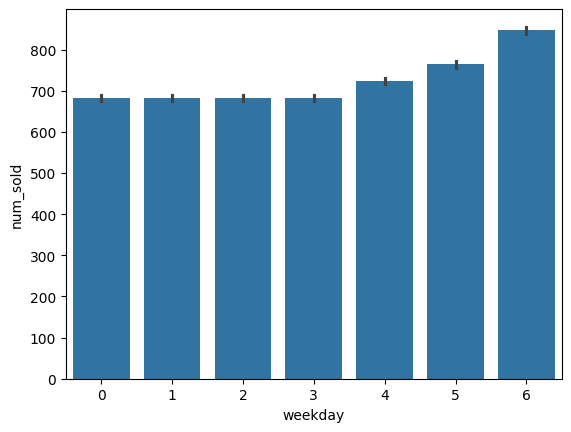

In [118]:
sns.barplot(x='weekday', y='num_sold', data=train)

As predicted, we can see an upswing in sales towards Sunday. And this effect is constant across countries, stores and products...

<Axes: xlabel='country', ylabel='num_sold'>

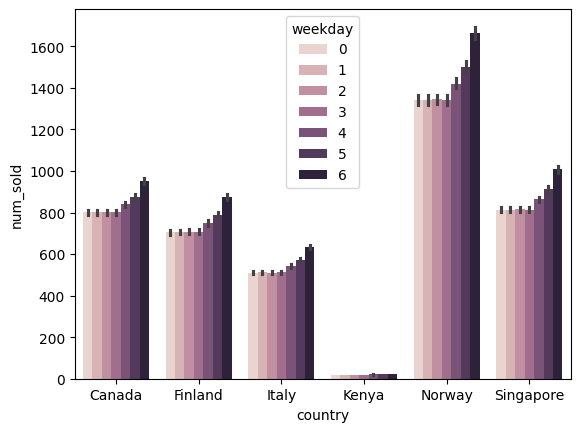

In [39]:
sns.barplot(x='country', y='num_sold', data=train, hue='weekday')

<Axes: xlabel='store', ylabel='num_sold'>

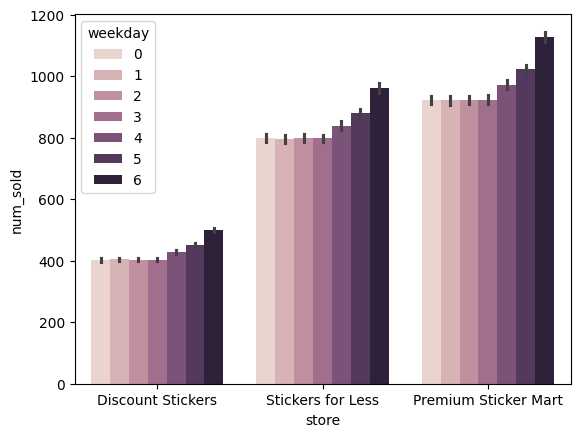

In [40]:
sns.barplot(x='store', y='num_sold', data=train, hue='weekday')

<Axes: xlabel='product', ylabel='num_sold'>

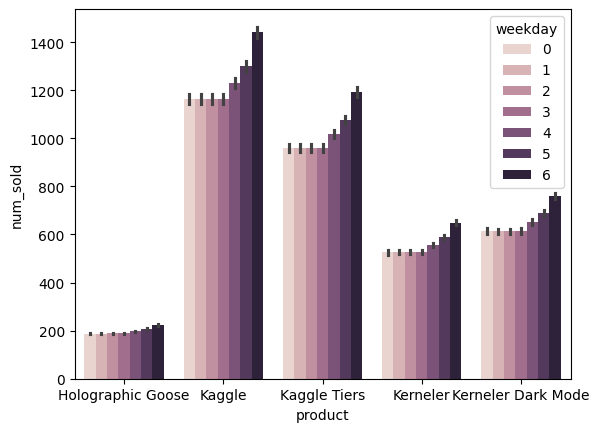

In [41]:
sns.barplot(x='product', y='num_sold', data=train, hue='weekday')

Just in case there is an impact from holidays such as Christmas, let's do a quick check for any annual patterns.

<Axes: xlabel='month', ylabel='num_sold'>

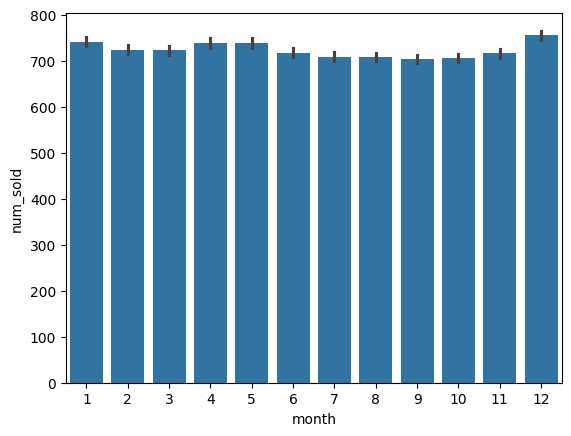

In [119]:
sns.barplot(x='month', y='num_sold', data=train)

A good thing we checked, there is an upswing in sales in December. And another notable one in April/May. While we're at it, let's isolate the day and year value..

<Axes: xlabel='monthday', ylabel='num_sold'>

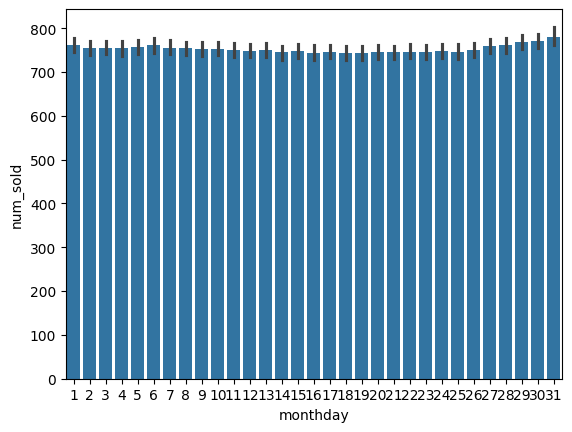

In [67]:
sns.barplot(x='monthday', y='num_sold', data=train)

Again we can see some uptick towards the end of the month. This is interesting as not all months have 31 days. Looking at our records we can see this is true.

In [72]:
train.query('monthday > 25').groupby('monthday').size()

monthday
26    7560
27    7560
28    7560
29    7110
30    6930
31    4410
dtype: int64

Next let's look at our data by year.

<Axes: xlabel='year', ylabel='num_sold'>

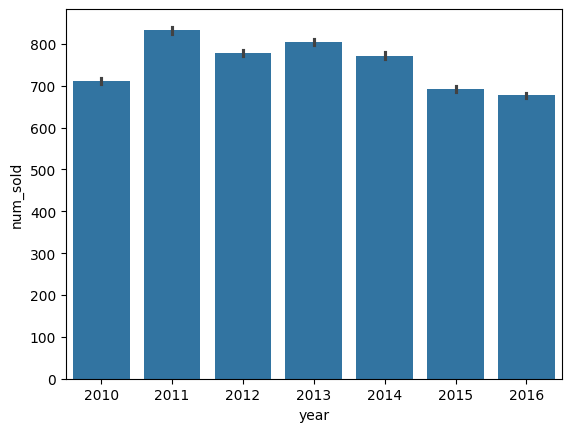

In [45]:
sns.barplot(x='year', y='num_sold', data=train)

Ah, we'll this complicates things a bit. It appears that sales are dropping off. This effect is not cyclical and, due to our dataset, there isn't much we can explore to predict this trend. We can cut it up by store, product and country and the effect is constant. Looking at it along side months, we can see that there is always a dip towards the end of the year and December is always a spike.

<Axes: xlabel='year', ylabel='num_sold'>

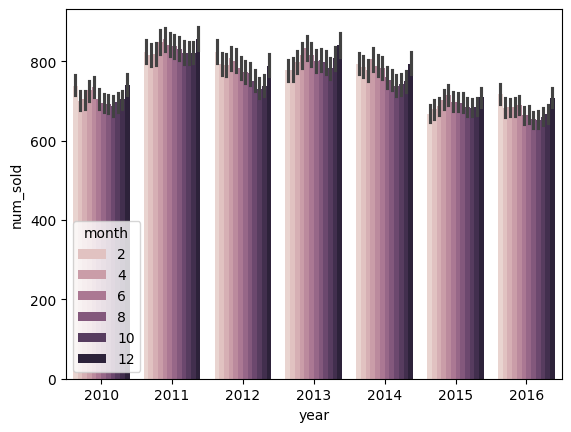

In [63]:
sns.barplot(x='year', y='num_sold', data=train, hue='month')

It would be worth checking at this point that each categorical variable is represented equally. Don't want to be impacted by any stores opened late in the picture or any products that were short runs or special editions.

In [57]:
print(train.groupby("country").size())
print(train.groupby("store").size())
print(train.groupby("product").size())

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
dtype: int64
store
Discount Stickers       76710
Premium Sticker Mart    76710
Stickers for Less       76710
dtype: int64
product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
dtype: int64


And no, it appears every thing that is represented in the dataset is represented from the start to the end.

## Target Variable
The next thing we should do is look at our target variable.

In [161]:
train.num_sold

0            0.0
1          973.0
2          906.0
3          423.0
4          491.0
           ...  
230125     466.0
230126    2907.0
230127    2299.0
230128    1242.0
230129    1622.0
Name: num_sold, Length: 230130, dtype: float64

(8871, 10)
(219312, 10)


Text(0.5, 1.0, 'Distribution of num_sold')

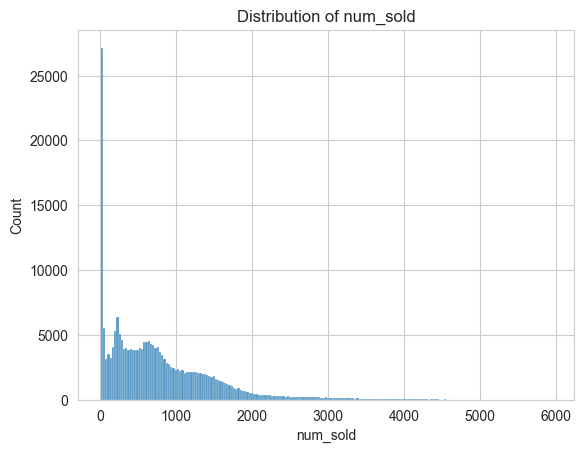

In [ ]:
sns.histplot(train.query('num_sold > 0')['num_sold'])
plt.title('Distribution of num_sold')


Our target variable is far from normally distributed. This makes sense, you can't sell less than 0 stickets. The distrbution looks to be a noisy power law distribution. IE the frequency is inversly proportional to the severity. We can confirm this by considering a log-log histogram plot and finding a fairly stable diagonal trend.

<Axes: xlabel='num_sold', ylabel='Count'>

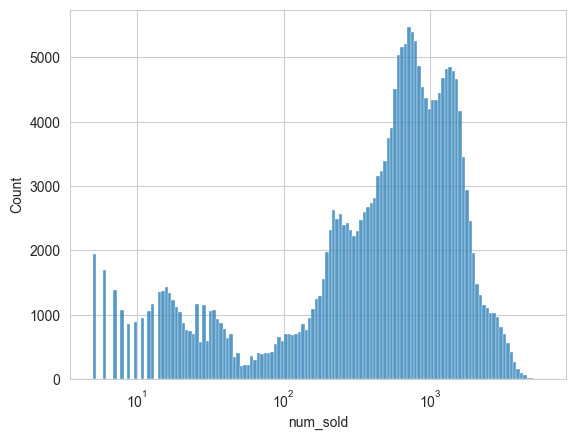

In [170]:
sns.histplot(train.query('num_sold > 0')['num_sold'],log_scale=True)

# Predictive Modelling
## Linear Regression
With little more we can do in terms of feature engineering, let's prep our test set features and run a simple linear regretion. This will serve as our initial predictive baseline. We'll consider the results and go from there. 

First we need to import our packages for modelling and instantiate our linear model.

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

lr = LinearRegression()

Next we need to adjust our variables. Any categorical variables will be one-hot encoded (1 for yes, 0 for no) so our model can use them mathematically.

In [ ]:

categorical_feature = ['country', 'store', 'product']
numerical_feature = ['weekday', 'day', 'month', 'year']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_feature),
        ('num', 'passthrough', numerical_feature)
    ])

x = train[['weekday', 'day', 'month', 'year', 'country', 'store', 'product']]
y = train['num_sold']

x_transformed = preprocessor.fit_transform(x)


Model Performance:
R² Score: 0.777
Mean Squared Error: 106712.453
Mean Absolute Error: 230.291
Root Mean Squared Error: 326.669


We can then fit our model to the data and have a look at the results.

In [133]:

lr.fit(x_transformed, y)

y_pred = lr.predict(x_transformed)

print("Model Performance:")
print(f"R² Score: {r2_score(y, y_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred):.3f}")
print(f"Root Mean Squared Error: {root_mean_squared_error(y, y_pred):.3f}")

Model Performance:
R² Score: 0.777
Mean Squared Error: 106712.453
Mean Absolute Error: 230.291
Root Mean Squared Error: 326.669


Not terrible but not great results. This makes sense for several reasons. Let's look closer.

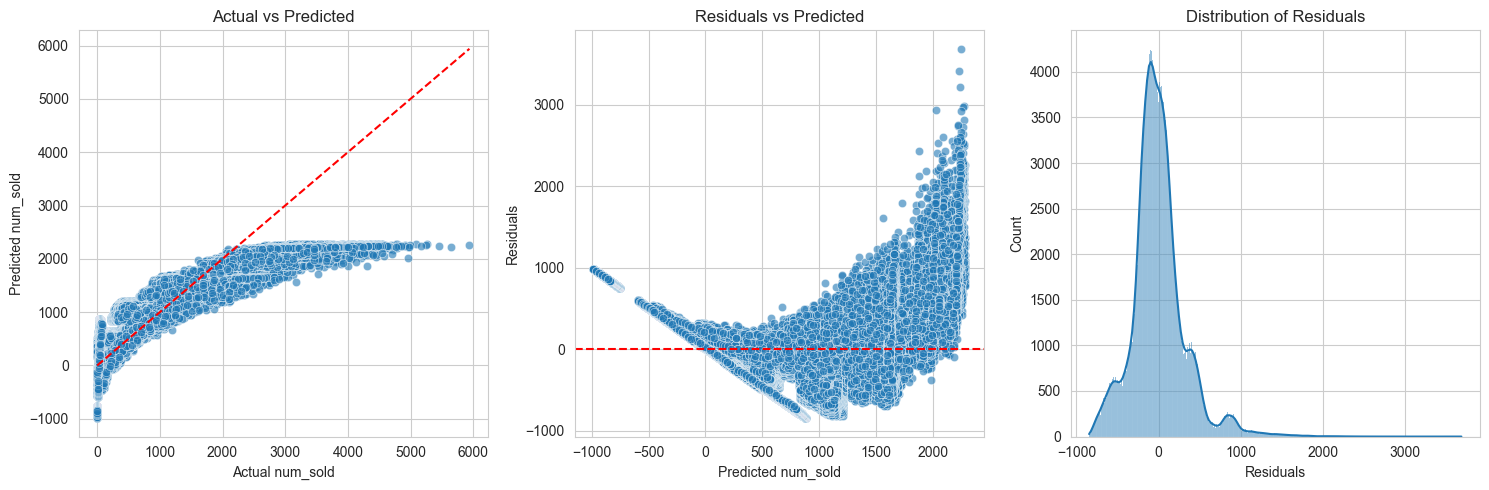

In [134]:
# Set seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

# 1. Actual vs Predicted scatter plot
plt.subplot(1, 3, 1)
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
sns.lineplot(x=[y.min(), y.max()], y=[y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual num_sold')
plt.ylabel('Predicted num_sold')
plt.title('Actual vs Predicted')

# 2. Residuals plot
plt.subplot(1, 3, 2)
residuals = y - y_pred
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted num_sold')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

# 3. Residuals distribution
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()